In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime

# set total capacity in MW
cap = 18.56

# import and rearange data
df_raw = pd.read_excel (r'C:\Users\Connor Trewhella\Documents\3YP\ninja_pv_45_1kW.xlsx')
df_useful = df_raw.tail(8760)
df_useful.reset_index(inplace=True)
df_useful = df_useful.rename(columns={'# Renewables.ninja Solar PV (Point API) - 51.658': 'Datetime', 'Unnamed: 2': 'Power (MW)'})
df_useful["Power(MW)"] = df_useful["Power (MW)"] * cap

# get hourly power
df_pwr_hourly = df_useful[["Datetime", "Power (MW)"]]      # note: this is also hourly energy (kWh)
#df_pwr_hourly.set_index(pd.to_datetime(df_pwr_hourly['Datetime']))

# get daily energy
df_energy_daily = df_pwr_hourly.groupby(pd.Grouper(key='Datetime', freq='1D')).sum().reset_index()
df_energy_daily = df_energy_daily.rename(columns={'Power (MW)': 'Energy (MWh)'})

In [112]:
df_energy_daily


,Datetime,Energy (MWh)
0,2019-01-01,0.431
1,2019-01-02,2.206
2,2019-01-03,1.378
3,2019-01-04,1.563
4,2019-01-05,1.379
...,...,...
360,2019-12-27,0.225
361,2019-12-28,0.349
362,2019-12-29,1.751
363,2019-12-30,1.500


In [113]:
df_pwr_hourly

,Datetime,Power (MW)
0,2019-01-01 00:00:00,0
1,2019-01-01 01:00:00,0
2,2019-01-01 02:00:00,0
3,2019-01-01 03:00:00,0
4,2019-01-01 04:00:00,0
...,...,...
8755,2019-12-31 19:00:00,0
8756,2019-12-31 20:00:00,0
8757,2019-12-31 21:00:00,0
8758,2019-12-31 22:00:00,0


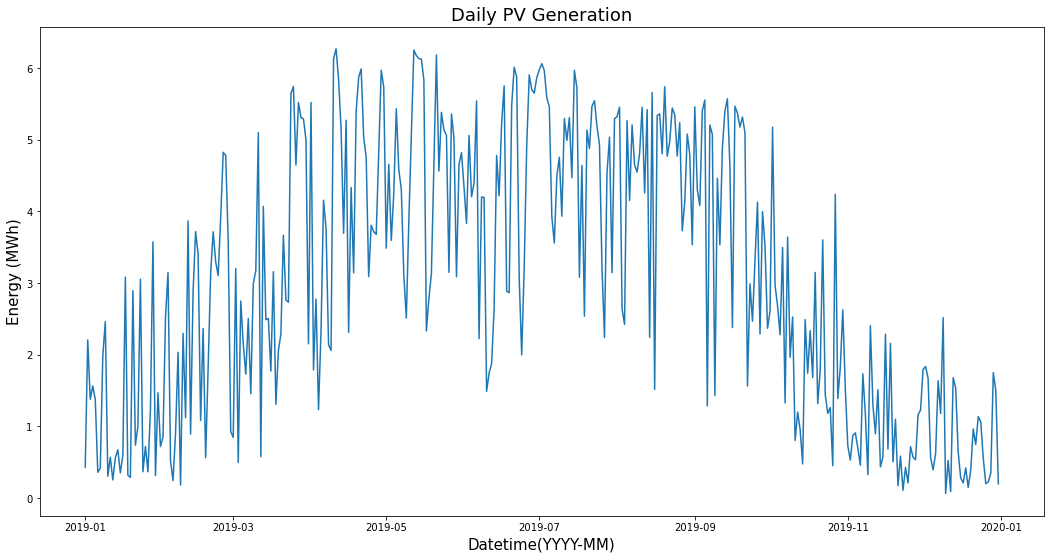

In [114]:
# plot daily energy
plt.figure(figsize=(18,9))
plt.plot(df_energy_daily['Datetime'],df_energy_daily['Energy (MWh)'])
plt.xlabel('Datetime(YYYY-MM)',fontsize=15)
plt.ylabel('Energy (MWh)',fontsize=15)
plt.title('Daily PV Generation',fontsize=18)
plt.show()